K-Means_Mall_Customers

1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
Data = pd.read_csv('./Mall_Customers.csv')

In [4]:
Data.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

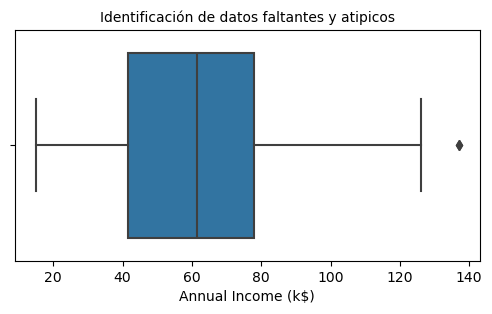

In [6]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Annual Income (k$)'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [7]:
print("Cantidad de registros con cero en edad: ",Data['Age'].isin([0]).sum())
print("Cantidad de registros con cero en ingresos anuales: ",Data['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de registros con cero en score de gasto: ",Data['Spending Score (1-100)'].isin([0]).sum())

Cantidad de registros con cero en edad:  0
Cantidad de registros con cero en ingresos anuales:  0
Cantidad de registros con cero en score de gasto:  0


In [8]:
Data['Annual Income (k$)']=Data['Annual Income (k$)'].replace(0,Data['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de datos atipicos')

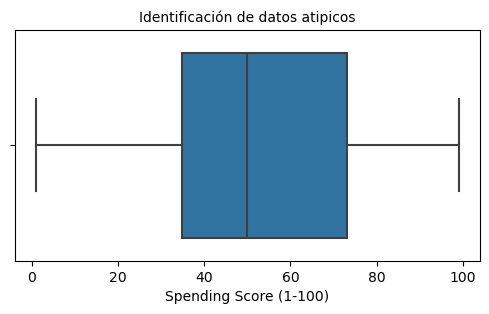

In [9]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Spending Score (1-100)'])
plt.title('Identificación de datos atipicos', fontsize=10)

In [10]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Data['Spending Score (1-100)']<nivel_minimo)|(Data['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [11]:
Data=Data[(Data['Spending Score (1-100)']<nivel_maximo)&(Data['Spending Score (1-100)']>nivel_minimo)]

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [13]:
Data = Data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [14]:
Data.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


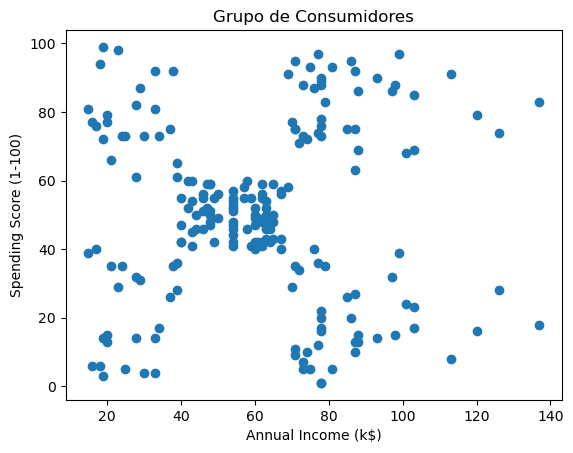

In [15]:
plt.scatter(Data['Annual Income (k$)'],Data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupo de Consumidores')
plt.show()

4.Entrenar el modelo configurando los diferentes hiperparámetros.

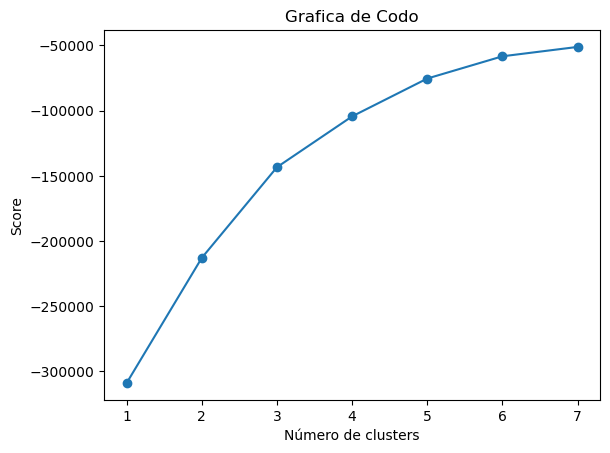

In [16]:
Nc = range(1,8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Data).score(Data) for i in range(len(kmeans))]
score
plt.plot(Nc,score,marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Grafica de Codo')
plt.show()

In [106]:
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Data)

KMeans(n_clusters=5, random_state=0)

In [107]:
Modelo.labels_
Data['Group'] = Modelo.labels_
print(Data)

     Age  Annual Income (k$)  Spending Score (1-100)  Group
0     19                  15                      39      0
1     21                  15                      81      4
2     20                  16                       6      0
3     23                  16                      77      4
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


5.Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [108]:
Observaciones = len(Data)
x = Data.drop('Group', axis=1)
clusters = Data['Group']

sil_score = silhouette_score(x, clusters)
calinski_score = calinski_harabasz_score(x, clusters)
davies_score = davies_bouldin_score(x, clusters)

table_datos = [
    ['Número de observaciones', Observaciones],
    ['Coeficiente Silhouette', sil_score],
    ['Indice Calinski Harabasz', calinski_score],
    ['Indice Davies Bouldin', davies_score]
]

from tabulate import tabulate
print(tabulate(table_datos, headers=['Metric','Value'], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Número de observaciones  |         200         |
|  Coeficiente Silhouette  | 0.44428597560893024 |
| Indice Calinski Harabasz | 151.04386000160667  |
|  Indice Davies Bouldin   | 0.8218781633199781  |
+--------------------------+---------------------+


6.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

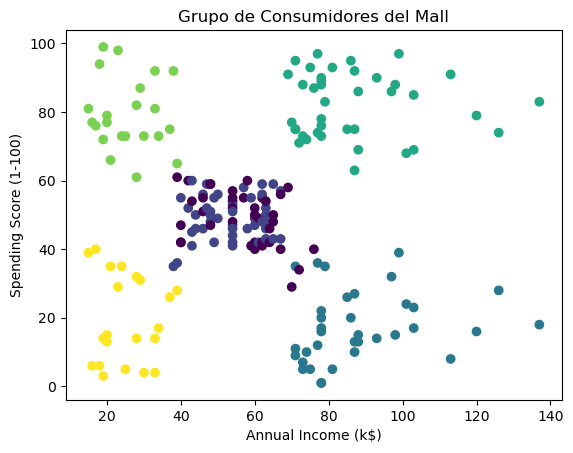

In [45]:
plt.scatter(Data['Annual Income (k$)'], Data['Spending Score (1-100)'], c=Data['Group'],cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupo de Consumidores del Mall')
plt.show()

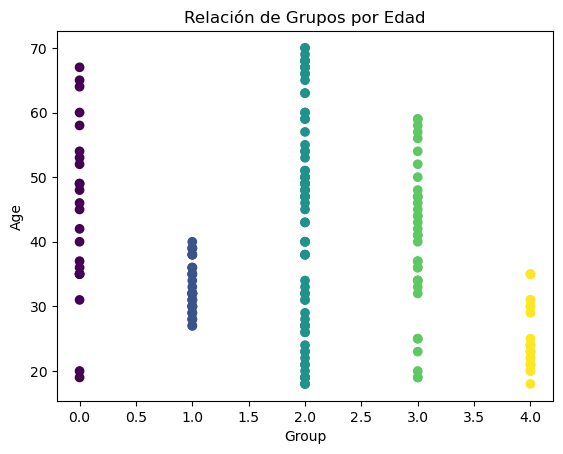

In [109]:
plt.scatter(Data['Group'], Data['Age'], c=Data['Group'],cmap='viridis')
plt.xlabel('Group')
plt.ylabel('Age')
plt.title('Relación de Grupos por Edad')
plt.show()

7.Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo podemos concluir:

•	Coeficiente de Silhouette: La puntuación de Silhouette con 4 clústeres es de aproximadamente de 0.405, con 5 clústeres es de 0.444 y de 0.452 con 6 clústeres, lo cual significa que la mejor cantidad de clústeres para realizar el modelo son de 6 clústeres, además indica una buena separación entre los grupos.
    
•	Indice de Calinski-Harabasz:La puntuación de Calinski-Harabasz es de 166.720 con 6 clústeres, mientras que usando 5 clústeres esta medida es de 151.043, los cual significa que se deben  utilizar 6 clúster para una mejor medición. La puntuación de 166.720 no es muy alta, sin embargo, hay una buena relación entre la dispersión de los clústeres y la separación que hay entre los mismos. 

•	Indice de Davies-Bouldin: La puntuación de Davies-Bouldin es de 0.8218 aproximadamente, es un valor más alto de lo esperado debido a que para este índice entre más bajo es el valor es mejor la relación entre la dispersión dentro de los clústeres y la separación de los mismos.

•	Según el grafico “Grupo de Consumidores del Mall, los consumidores con ingresos anuales entre aproximadamente $ 40.000 y $ 60.000, a su vez tienes un Score de gasto entre 40 y 60 puntos.

•	Los consumidores con Ingresos anuales entre $ 0 y $40.000 y aproximadamente $ 80.000 hasta $ 137.000, NO tienen un score de gasto definido entre 40 y 60 puntos.

•	Según el grafico “Relación de Grupos por Edad”, los consumidores pertenecientes a los grupos 1 y 4, no superan los 40 años de edad  .

    